In [59]:
import pandas as pd
import folium
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [80]:
df_fumo = pd.read_csv('dados/fumo.csv')

In [81]:
df_fumo.head()

,id,UF,Esperança de vida ao nascer (Anos),Situação Censitária,Área,Peso Final,Altura Final,Está grávida?,"Atualmente, fuma algum produto do tabaco?","E no passado, fumou algum produto do tabaco?",...,Com que frequência alguém fuma dentro do seu domicílio?,"Nos últimos trinta dias, viu alguma propaganda ou anúncio de cigarros nos pontos de venda de cigarros?","Nos últimos 30 dias, viu alguma propaganda ou anúncio de cigarros na internet, incluindo redes sociais?",Viu ou ouviu informações nos jornais ou revistas?,Viu ou ouviu informações na televisão?,Viu ou ouviu informações no rádio?,"Viu ou ouviu informações na internet, incluindo redes sociais?","Nos últimos trinta dias, viu alguma foto ou advertência sobre os riscos de fumar nos maços de cigarros?","Nos últimos 30 dias, as advertências nos maços de cigarro que viu o levaram a pensar em parar de fumar?",Total de dias que parou de fumar
0,0,RO,71.91,1,1,60.0,145.0,2.0,3.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,7300.0
1,9,RO,71.91,1,1,65.0,152.0,2.0,1.0,NaN,...,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,NaN
2,10,RO,71.91,1,1,77.0,155.0,2.0,3.0,1.0,...,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,9125.0
3,18,RO,71.91,1,1,56.0,159.0,2.0,3.0,3.0,...,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
4,19,RO,71.91,1,1,55.0,176.0,2.0,3.0,3.0,...,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN


In [82]:
df_fumo.shape

(90846, 32)

In [84]:
df_fumo = df_fumo.drop(columns = ['Nos últimos doze meses, durante algum atendimento, por médico ou outro profissional de saúde, foi perguntado se fumava?', 'Durante os últimos doze meses, quando tentou parar de fumar, usou aconselhamento por profissional de saúde incluindo unidades de saúde que oferecem tratamento para parar de fumar?', 'Pagou algum valor por esse aconselhamento?', 'Durante os últimos 12 meses, quando tentou parar de fumar, usou medicamento(s) que auxilia( m) as pessoas no processo de deixar de fumar?', 'Pagou algum valor por esse(s) medicamento(s)?', 'Algum medicamento foi obtido em serviço público de saúde?', 'Durante os últimos 12 meses, por que não usou nem aconselhamento nem medicamento para tentar parar de fumar?',  'Nos últimos trinta dias, viu alguma propaganda ou anúncio de cigarros nos pontos de venda de cigarros?', 'Nos últimos 30 dias, viu alguma propaganda ou anúncio de cigarros na internet, incluindo redes sociais?', 'Nos últimos trinta dias, viu alguma foto ou advertência sobre os riscos de fumar nos maços de cigarros?', 'Nos últimos 30 dias, as advertências nos maços de cigarro que viu o levaram a pensar em parar de fumar?', 'Que idade tinha quando começou a fumar produto de tabaco diariamente?', 'Total de dias que parou de fumar'])

In [85]:
df_corr = df_fumo.drop(columns = ['UF', 'Está grávida?'])

In [86]:
df_corr['Viu ou ouviu informações em veiculos de comunicação'] = df_corr[['Viu ou ouviu informações nos jornais ou revistas?',
       'Viu ou ouviu informações na televisão?',
       'Viu ou ouviu informações no rádio?',
       'Viu ou ouviu informações na internet, incluindo redes sociais?']].apply(
    lambda row: 1 if (row == 1).any() else 2, axis=1)
df_corr

,id,Esperança de vida ao nascer (Anos),Situação Censitária,Área,Peso Final,Altura Final,"Atualmente, fuma algum produto do tabaco?","E no passado, fumou algum produto do tabaco?","Nos últimos doze meses, durante algum desses atendimentos foi aconselhado a parar de fumar?","Durante os últimos doze meses, tentou parar de fumar?",Esse aconselhamento foi feito pelo SUS?,Usa aparelhos eletrônicos com nicotina líquida ou folha de tabaco picado?,Com que frequência alguém fuma dentro do seu domicílio?,Viu ou ouviu informações nos jornais ou revistas?,Viu ou ouviu informações na televisão?,Viu ou ouviu informações no rádio?,"Viu ou ouviu informações na internet, incluindo redes sociais?",Viu ou ouviu informações em veiculos de comunicação
0,0,71.91,1,1,60.0,145.0,3.0,1.0,NaN,NaN,NaN,4.0,1.0,2.0,2.0,2.0,2.0,2
1,9,71.91,1,1,65.0,152.0,1.0,NaN,NaN,2.0,NaN,4.0,1.0,2.0,2.0,2.0,1.0,1
2,10,71.91,1,1,77.0,155.0,3.0,1.0,NaN,NaN,NaN,4.0,5.0,2.0,2.0,2.0,2.0,2
3,18,71.91,1,1,56.0,159.0,3.0,3.0,NaN,NaN,NaN,4.0,5.0,2.0,2.0,2.0,2.0,2
4,19,71.91,1,1,55.0,176.0,3.0,3.0,NaN,NaN,NaN,4.0,5.0,2.0,2.0,2.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,293709,78.85,2,1,63.0,168.0,1.0,NaN,NaN,2.0,NaN,4.0,1.0,2.0,1.0,2.0,2.0,1
90842,293712,78.85,2,1,72.0,168.0,1.0,NaN,1.0,2.0,NaN,4.0,1.0,2.0,2.0,2.0,2.0,2
90843,293713,78.85,2,1,87.0,163.0,3.0,1.0,NaN,NaN,NaN,4.0,5.0,1.0,2.0,3.0,1.0,1
90844,293718,78.85,2,1,89.0,168.0,3.0,3.0,NaN,NaN,NaN,4.0,5.0,1.0,1.0,1.0,2.0,1


In [87]:
df_corr['Atualmente, fuma algum produto do tabaco?'] = df_corr['Atualmente, fuma algum produto do tabaco?'].replace({1: 'Sim, diariamente', 2: 'Sim, menos que diariamente', 3: 'Não fumo atualmente'})
df_corr['E no passado, fumou algum produto do tabaco?'] = df_corr['E no passado, fumou algum produto do tabaco?'].replace({1: 'Sim, diariamente', 2: 'Sim, menos que diariamente', 3: 'Não, nunca fumei'})
df_corr['Nos últimos doze meses, durante algum desses atendimentos foi aconselhado a parar de fumar?'] = df_corr['Nos últimos doze meses, durante algum desses atendimentos foi aconselhado a parar de fumar?'].replace({1: 'Sim', 2: 'Não'})
df_corr['Durante os últimos doze meses, tentou parar de fumar?'] = df_corr['Durante os últimos doze meses, tentou parar de fumar?'].replace({1: 'Sim', 2: 'Não'})
df_corr['Esse aconselhamento foi feito pelo SUS?'] = df_corr['Esse aconselhamento foi feito pelo SUS?'].replace({1: 'Sim', 2: 'Não'})
df_corr['Usa aparelhos eletrônicos com nicotina líquida ou folha de tabaco picado?'] = df_corr['Usa aparelhos eletrônicos com nicotina líquida ou folha de tabaco picado?'].replace({1: 'Sim, diariamente', 2: 'Sim, menos do que diariamente', 3: 'Não, mas já usei no passado', 4: 'Nunca usei'})
df_corr['Com que frequência alguém fuma dentro do seu domicílio?'] = df_corr['Com que frequência alguém fuma dentro do seu domicílio?'].replace({1: 'Diariamente', 2: 'Semanalmente', 3: 'Mensalmente', 4: 'Menos que mensalmente', 5: 'Nunca'})
df_corr['Viu ou ouviu informações em veiculos de comunicação'] = df_corr['Viu ou ouviu informações em veiculos de comunicação'].replace({1: 'Sim', 2: 'Não'})

df_dummies1 = pd.get_dummies(df_corr['Atualmente, fuma algum produto do tabaco?'], prefix='fuma_tabaco')
df_dummies2 = pd.get_dummies(df_corr['E no passado, fumou algum produto do tabaco?'], prefix='fumou_tabaco')
df_dummies3 = pd.get_dummies(df_corr['Nos últimos doze meses, durante algum desses atendimentos foi aconselhado a parar de fumar?'], prefix='atendimento_aconselhou_parar')
df_dummies4 = pd.get_dummies(df_corr['Durante os últimos doze meses, tentou parar de fumar?'], prefix='tentou_parar')
df_dummies5 = pd.get_dummies(df_corr['Esse aconselhamento foi feito pelo SUS?'], prefix='aconselhamento_sus?')
df_dummies6 = pd.get_dummies(df_corr['Com que frequência alguém fuma dentro do seu domicílio?'], prefix='familiar_fuma_domicilio?')
df_dummies7 = pd.get_dummies(df_corr['Viu ou ouviu informações em veiculos de comunicação'], prefix='viu_propagandas?')

df_dummies = pd.concat([df_corr, df_dummies1], axis=1)
df_dummies = pd.concat([df_dummies, df_dummies2], axis=1)
df_dummies = pd.concat([df_dummies, df_dummies3], axis=1)
df_dummies = pd.concat([df_dummies, df_dummies4], axis=1)
df_dummies = pd.concat([df_dummies, df_dummies5], axis=1)
df_dummies = pd.concat([df_dummies, df_dummies6], axis=1)
df_dummies = pd.concat([df_dummies, df_dummies7], axis=1)

df_dummies.drop(columns = ['Atualmente, fuma algum produto do tabaco?',
'E no passado, fumou algum produto do tabaco?',
'Nos últimos doze meses, durante algum desses atendimentos foi aconselhado a parar de fumar?',
'Durante os últimos doze meses, tentou parar de fumar?',
'Esse aconselhamento foi feito pelo SUS?',
'Usa aparelhos eletrônicos com nicotina líquida ou folha de tabaco picado?',
'Com que frequência alguém fuma dentro do seu domicílio?',
'Viu ou ouviu informações nos jornais ou revistas?',
'Viu ou ouviu informações na televisão?',
'Viu ou ouviu informações no rádio?',
'Viu ou ouviu informações na internet, incluindo redes sociais?'], inplace = True)

df_dummies


,id,Esperança de vida ao nascer (Anos),Situação Censitária,Área,Peso Final,Altura Final,Viu ou ouviu informações em veiculos de comunicação,fuma_tabaco_Não fumo atualmente,"fuma_tabaco_Sim, diariamente","fuma_tabaco_Sim, menos que diariamente",...,tentou_parar_Sim,aconselhamento_sus?_Não,aconselhamento_sus?_Sim,familiar_fuma_domicilio?_Diariamente,familiar_fuma_domicilio?_Menos que mensalmente,familiar_fuma_domicilio?_Mensalmente,familiar_fuma_domicilio?_Nunca,familiar_fuma_domicilio?_Semanalmente,viu_propagandas?_Não,viu_propagandas?_Sim
0,0,71.91,1,1,60.0,145.0,Não,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,9,71.91,1,1,65.0,152.0,Sim,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,10,71.91,1,1,77.0,155.0,Não,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,18,71.91,1,1,56.0,159.0,Não,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,19,71.91,1,1,55.0,176.0,Não,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,293709,78.85,2,1,63.0,168.0,Sim,0,1,0,...,0,0,0,1,0,0,0,0,0,1
90842,293712,78.85,2,1,72.0,168.0,Não,0,1,0,...,0,0,0,1,0,0,0,0,1,0
90843,293713,78.85,2,1,87.0,163.0,Sim,1,0,0,...,0,0,0,0,0,0,1,0,0,1
90844,293718,78.85,2,1,89.0,168.0,Sim,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [89]:
df_dummies.to_csv('bases_agrupadas/fumo.csv')

C:\Users\ferrem48\AppData\Local\Temp\ipykernel_31740\3404562772.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_dummies.corr()


<Axes: >

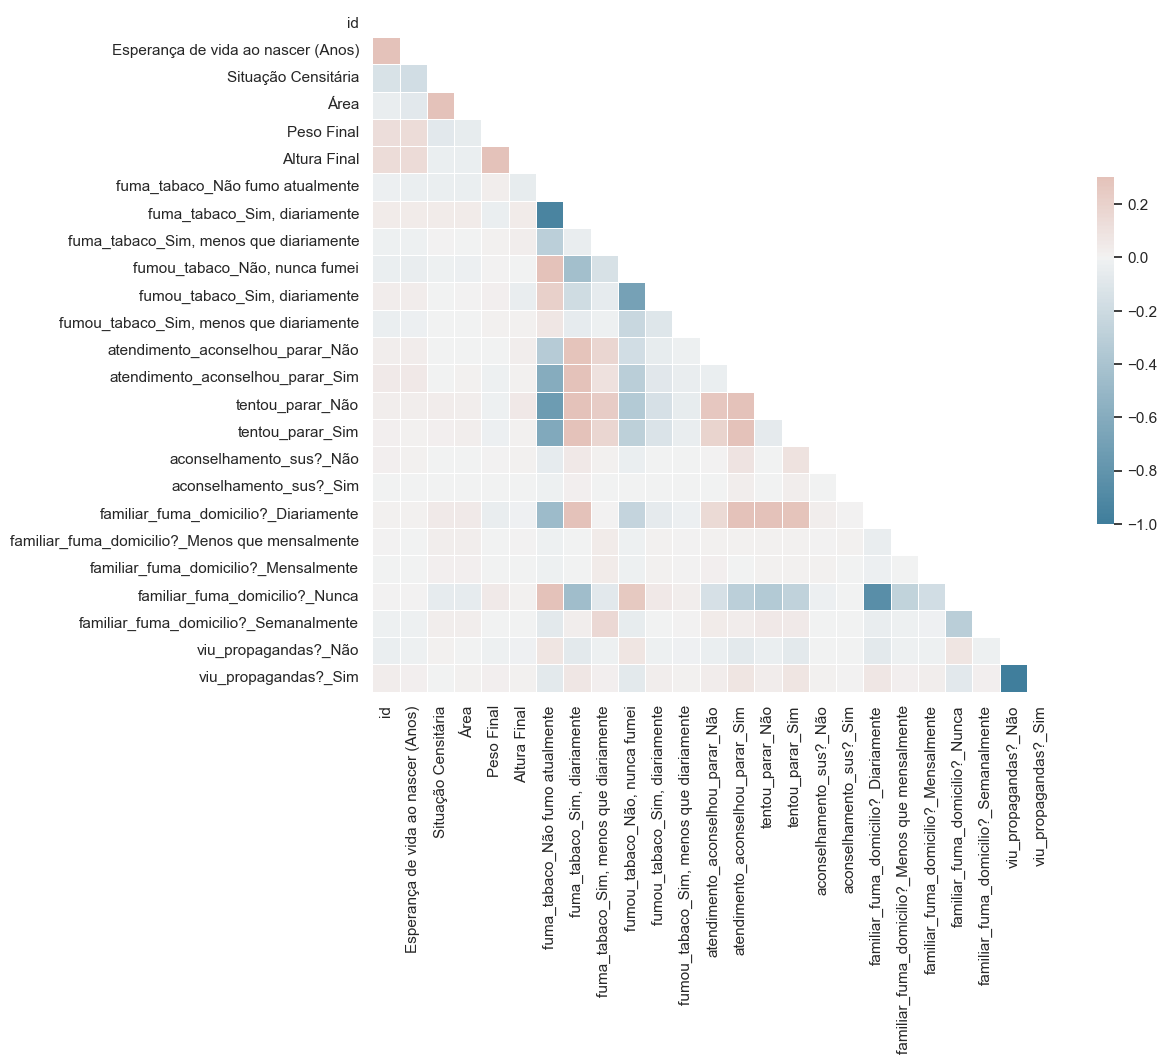

In [90]:
sns.set_theme(style="white")

# df_dummies.drop(columns = ['id'], inplace = True)
 
# Compute the correlation matrix
corr = df_dummies.corr()
 
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}
            # , annot=True, fmt=".2f"
            )

In [10]:
uf_fumo = df_fumo.groupby(['UF', 'Atualmente, fuma algum produto do tabaco?']).size().unstack(fill_value=0)
uf_fumo

"Atualmente, fuma algum produto do tabaco?",1.0,2.0,3.0
UF,,,
AC,307,32,2041
AL,302,27,2658
AM,309,79,3091
AP,132,53,1369
BA,304,46,3309
CE,473,51,3741
DF,227,41,2097
ES,350,39,3152
GO,344,27,2331


In [11]:
uf_fumo = df_fumo.groupby(['UF', 'E no passado, fumou algum produto do tabaco?']).size().unstack(fill_value=0)
uf_fumo

"E no passado, fumou algum produto do tabaco?",1.0,2.0,3.0
UF,,,
AC,495,88,1458
AL,642,86,1930
AM,581,156,2354
AP,312,67,990
BA,1083,149,2077
CE,1101,149,2491
DF,439,89,1569
ES,899,117,2136
GO,664,75,1592


In [12]:
uf_idade_fumo = df_fumo.groupby('UF')['Que idade tinha quando começou a fumar produto de tabaco diariamente?'].mean().reset_index()
uf_idade_fumo

,UF,Que idade tinha quando começou a fumar produto de tabaco diariamente?
0,AC,15.924390
1,AL,15.606882
2,AM,16.442060
3,AP,17.232848
4,BA,17.336402
5,CE,15.937189
6,DF,17.192982
7,ES,17.351458
8,GO,16.700000
9,MA,16.547913


In [ ]:
uf_fumo = df_fumo.groupby(['UF', 'Atualmente, fuma algum produto do tabaco?']).size().unstack(fill_value=0)
uf_fumo